In [1]:
import pandas as pd
import numpy as np
import plotly as pl
from plotly.offline import iplot
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn import preprocessing

pd.options.display.float_format = '{:.2f}'.format

In [2]:
df_esports_general = pd.read_csv('data\GeneralEsportData.csv')
df_esports_general.head()

,Game,ReleaseDate,Genre,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,510716.46,375857.63,0.74,473,265
1,Age of Empires II,1999,Strategy,3253232.59,1139384.57,0.35,1994,1613
2,Age of Empires III,2005,Strategy,115843.65,41800.00,0.36,166,163
3,Age of Empires IV,2021,Strategy,994675.03,409117.93,0.41,542,327
4,Age of Empires Online,2011,Strategy,9806.56,775.00,0.08,44,50


In [3]:
df_esports_hist = pd.read_csv('data\HistoricalEsportData.csv')
df_esports_hist.head()

,Date,Game,Earnings,Players,Tournaments
0,1998-01-01,Command & Conquer: Red Alert,15000.00,8,1
1,1998-01-01,QuakeWorld,15000.00,8,1
2,1998-05-01,Quake II,15000.00,4,1
3,1998-05-01,Total Annihilation,15000.00,2,1
4,1998-05-01,QuakeWorld,300.00,3,1


In [4]:
df_esports_general = df_esports_general[df_esports_general['TotalEarnings']>0]
df_esports_general.sort_values('TotalEarnings',ascending=False,inplace=True)
df_esports_general.head()

,Game,ReleaseDate,Genre,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments
208,Dota 2,2013,Multiplayer Online Battle Arena,337107974.16,298290573.89,0.88,4784,1841
621,Fortnite,2017,Battle Royale,169935795.99,48728256.19,0.29,7819,1735
110,Counter-Strike: Global Offensive,2012,First-Person Shooter,161615824.69,105053084.68,0.65,16272,6886
214,League of Legends,2009,Multiplayer Online Battle Arena,105011055.56,90815673.41,0.86,9211,2895
200,Arena of Valor,2015,Multiplayer Online Battle Arena,77920901.06,73831635.30,0.95,1986,156


In [5]:
df_esports_hist = df_esports_hist[df_esports_hist['Game'].isin(df_esports_general['Game'])]
df_esports_hist.head()

,Date,Game,Earnings,Players,Tournaments
0,1998-01-01,Command & Conquer: Red Alert,15000.00,8,1
1,1998-01-01,QuakeWorld,15000.00,8,1
2,1998-05-01,Quake II,15000.00,4,1
3,1998-05-01,Total Annihilation,15000.00,2,1
4,1998-05-01,QuakeWorld,300.00,3,1


In [6]:
df_hist_genero = pd.merge(df_esports_hist,df_esports_general[['Game','Genre']],how='outer',on='Game')
df_hist_genero

,Date,Game,Earnings,Players,Tournaments,Genre
0,2017-07-01,ARMS,1195.00,17,5,Fighting Game
1,2017-08-01,ARMS,91.00,5,2,Fighting Game
2,2017-09-01,ARMS,50.00,4,3,Fighting Game
3,2017-10-01,ARMS,261.00,3,2,Fighting Game
4,2017-11-01,ARMS,695.00,9,4,Fighting Game
...,...,...,...,...,...,...
9215,2022-07-01,rFactor 2,103239.47,46,3,Racing
9216,2022-08-01,rFactor 2,167.78,20,1,Racing
9217,2022-09-01,rFactor 2,9960.00,8,1,Racing
9218,2022-11-01,rFactor 2,5123.56,29,2,Racing


In [7]:
df_hist_anual = df_esports_hist[['Date','Earnings','Players','Tournaments']]
df_hist_anual['Date'] = df_hist_anual['Date'].str[:4]
df_hist_anual = df_hist_anual.groupby('Date',as_index=False).sum()
df_hist_anual


C:\Users\ekait\AppData\Local\Temp\ipykernel_14040\1984424647.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Earnings,Players,Tournaments
0,1998,153800.00,68,11
1,1999,285319.12,81,16
2,2000,769783.48,350,65
3,2001,940232.48,589,65
4,2002,1037355.15,815,87
5,2003,1950276.28,1599,203
6,2004,3068007.25,2603,299
7,2005,4405554.68,2987,383
8,2006,5783430.51,4008,448
9,2007,7599253.86,4681,566


In [8]:
std_scale = preprocessing.StandardScaler().fit(df_hist_anual[['Earnings','Players','Tournaments']])
df_std = std_scale.transform(df_hist_anual[['Earnings','Players','Tournaments']])
df_std


array([[-0.73165211, -0.8657498 , -1.00786675],
       [-0.73014198, -0.86521794, -1.00571919],
       [-0.72457926, -0.85421237, -0.98467309],
       [-0.72262213, -0.84443419, -0.98467309],
       [-0.72150695, -0.83518787, -0.97522383],
       [-0.7110246 , -0.80311217, -0.92540042],
       [-0.69819057, -0.76203563, -0.88416725],
       [-0.68283257, -0.74632508, -0.84808823],
       [-0.66701151, -0.70455302, -0.82016995],
       [-0.64616184, -0.67701864, -0.76948751],
       [-0.64511737, -0.67305009, -0.76819898],
       [-0.68494496, -0.66527664, -0.72224118],
       [-0.66024603, -0.61450374, -0.57835461],
       [-0.61122341, -0.55620288, -0.28370929],
       [-0.56614612, -0.43526437, -0.14411784],
       [-0.47143584, -0.3226721 , -0.00366737],
       [-0.29513126, -0.13271355,  0.35411624],
       [ 0.0478299 ,  0.4025498 ,  1.26983611],
       [ 0.4109462 ,  0.55319106,  1.10748053],
       [ 0.6444138 ,  0.81658824,  1.19424198],
       [ 1.2304794 ,  1.15199212,  1.175

In [9]:
df_std_hist_anual = pd.DataFrame(df_std,columns=['Earnings','Players','Tournaments'],index=df_hist_anual['Date'])
df_std_hist_anual.reset_index(inplace=True)
df_std_hist_anual

,Date,Earnings,Players,Tournaments
0,1998,-0.73,-0.87,-1.01
1,1999,-0.73,-0.87,-1.01
2,2000,-0.72,-0.85,-0.98
3,2001,-0.72,-0.84,-0.98
4,2002,-0.72,-0.84,-0.98
5,2003,-0.71,-0.80,-0.93
6,2004,-0.70,-0.76,-0.88
7,2005,-0.68,-0.75,-0.85
8,2006,-0.67,-0.70,-0.82
9,2007,-0.65,-0.68,-0.77


In [10]:
trace1 = go.Scatter(
                    x = df_std_hist_anual['Date'],
                    y = df_std_hist_anual['Earnings'],
                    name = 'Earnings',
                    mode= 'lines',
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))

trace2 = go.Scatter(
                    x = df_std_hist_anual['Date'],
                    y = df_std_hist_anual['Players'],
                    name = 'Players',
                    mode= 'lines',
                    marker = dict(color = 'rgba(200, 65, 10, 0.8)'))

trace3 = go.Scatter(
                    x = df_std_hist_anual['Date'],
                    y = df_std_hist_anual['Tournaments'],
                    name = 'Tournaments',
                    mode= 'lines',
                    marker = dict(color = 'rgba(20, 112, 100, 0.8)'))

data = [trace1, trace2, trace3]

layout = dict(title = 'Earnings, Players and Tournaments of esports by year',
             xaxis= dict(title= '')
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)

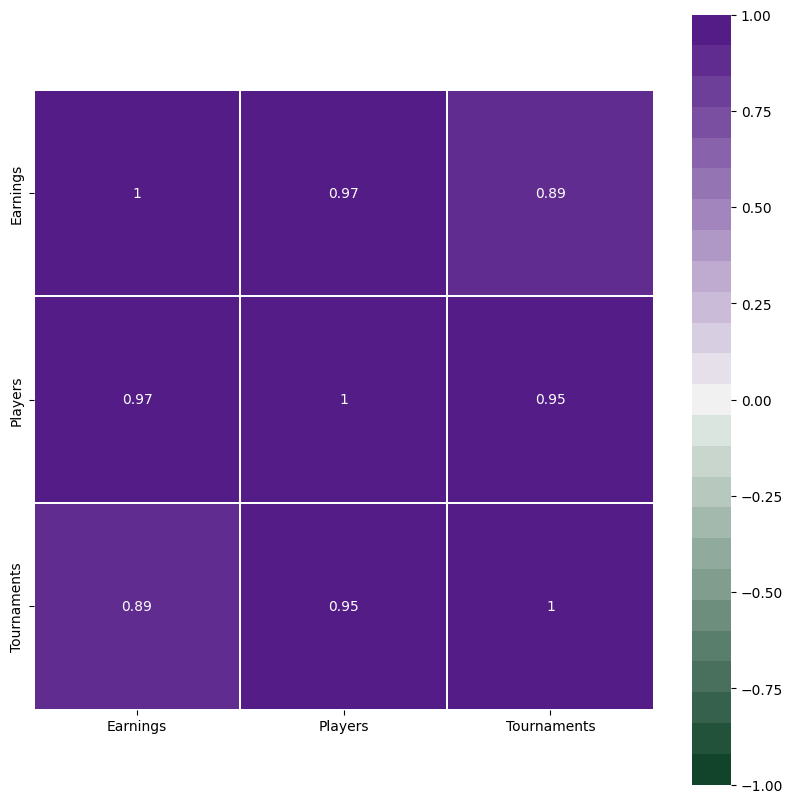

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df_hist_anual.corr(numeric_only=True),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=25),
            square=True,
            linewidths=.1,
            annot=True);

In [12]:
df_hist_anual_genero = df_hist_genero[['Date','Earnings','Players','Tournaments','Genre']]
df_hist_anual_genero['Date'] = df_hist_anual_genero['Date'].str[:4]
df_hist_anual_genero = df_hist_anual_genero.groupby(['Date','Genre'],as_index=False).sum()
df_hist_anual_genero.sort_values(['Date','Earnings'],ascending=[True,False],inplace=True)

C:\Users\ekait\AppData\Local\Temp\ipykernel_14040\695005480.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:

df_hist_anual_genero_top3 = df_hist_anual_genero.groupby('Date',sort=True).head(3)
df_hist_anual_genero_top3.head()

,Date,Genre,Earnings,Players,Tournaments
0,1998,First-Person Shooter,101800.00,49,7
1,1998,Strategy,52000.00,19,4
3,1999,Strategy,149719.12,49,11
2,1999,First-Person Shooter,135600.00,32,5
5,2000,First-Person Shooter,456286.15,241,32


In [14]:
df_hist_anual_genero_top3_period1 = df_hist_anual_genero_top3.copy()
df_hist_anual_genero_top3_period1 = df_hist_anual_genero_top3_period1[(df_hist_anual_genero_top3_period1['Date'] <= '2004') & (df_hist_anual_genero_top3_period1['Date'] >= '1998')]
df_hist_anual_genero_top3_period1.head()

,Date,Genre,Earnings,Players,Tournaments
0,1998,First-Person Shooter,101800.00,49,7
1,1998,Strategy,52000.00,19,4
3,1999,Strategy,149719.12,49,11
2,1999,First-Person Shooter,135600.00,32,5
5,2000,First-Person Shooter,456286.15,241,32


In [15]:
df_hist_anual_genero_top3_period2 = df_hist_anual_genero_top3.copy()
df_hist_anual_genero_top3_period2 = df_hist_anual_genero_top3_period2[(df_hist_anual_genero_top3_period2['Date'] <= '2010') & (df_hist_anual_genero_top3_period2['Date'] >= '2005')]
df_hist_anual_genero_top3_period2.head(50)

,Date,Genre,Earnings,Players,Tournaments
28,2005,First-Person Shooter,2968891.75,2323,191
32,2005,Strategy,1192733.13,495,137
31,2005,Sports,124973.19,23,9
34,2006,First-Person Shooter,3567334.86,3011,234
38,2006,Strategy,1499660.27,698,148
37,2006,Sports,245069.99,32,13
40,2007,First-Person Shooter,3831793.03,3290,218
45,2007,Strategy,2190959.05,798,209
44,2007,Sports,454365.55,64,19
48,2008,First-Person Shooter,3937062.84,3324,250


In [16]:
df_hist_anual_genero_top3_period3 = df_hist_anual_genero_top3.copy()
df_hist_anual_genero_top3_period3 = df_hist_anual_genero_top3_period3[(df_hist_anual_genero_top3_period3['Date'] <= '2017') & (df_hist_anual_genero_top3_period3['Date'] >= '2011')]
df_hist_anual_genero_top3_period3.head(50)

,Date,Genre,Earnings,Players,Tournaments
83,2011,Strategy,3832204.89,2204,934
78,2011,First-Person Shooter,3407173.95,3032,271
79,2011,Multiplayer Online Battle Arena,2618685.78,1473,222
87,2012,Multiplayer Online Battle Arena,6943234.60,3835,565
91,2012,Strategy,4573800.37,2626,826
86,2012,First-Person Shooter,2090701.24,3093,315
96,2013,Multiplayer Online Battle Arena,11496008.96,5113,614
100,2013,Strategy,4530809.73,2437,641
95,2013,First-Person Shooter,4132884.56,3912,430
104,2014,Multiplayer Online Battle Arena,25731262.94,6741,701


In [17]:
df_hist_anual_genero_top3_period4 = df_hist_anual_genero_top3.copy()
df_hist_anual_genero_top3_period4 = df_hist_anual_genero_top3_period4[(df_hist_anual_genero_top3_period4['Date'] <= '2023') & (df_hist_anual_genero_top3_period4['Date'] >= '2018')]
df_hist_anual_genero_top3_period4.head(50)

,Date,Genre,Earnings,Players,Tournaments
149,2018,Multiplayer Online Battle Arena,70621382.67,9966,468
148,2018,First-Person Shooter,44009629.15,20178,1678
145,2018,Battle Royale,29201551.44,5721,323
157,2019,Battle Royale,100154934.46,16022,768
161,2019,Multiplayer Online Battle Arena,70153233.06,10116,529
160,2019,First-Person Shooter,47589736.35,18646,1312
172,2020,First-Person Shooter,46566140.39,22223,1505
169,2020,Battle Royale,36276951.37,15499,736
173,2020,Multiplayer Online Battle Arena,30962139.55,8524,347
185,2021,Multiplayer Online Battle Arena,80514963.01,10439,343


<Figure size 2000x1500 with 0 Axes>

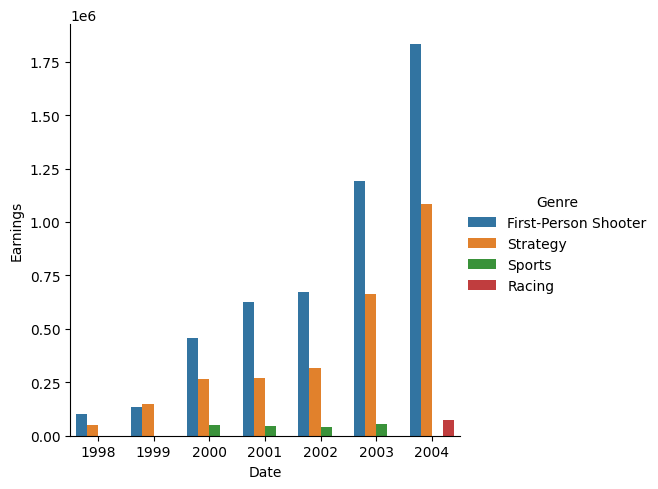

In [18]:
plt.figure(figsize=(20,15))
sns.catplot(x="Date",
            y="Earnings",
            hue="Genre",
            kind="bar",
            data=df_hist_anual_genero_top3_period1,
            errorbar=None);

<Figure size 2000x1500 with 0 Axes>

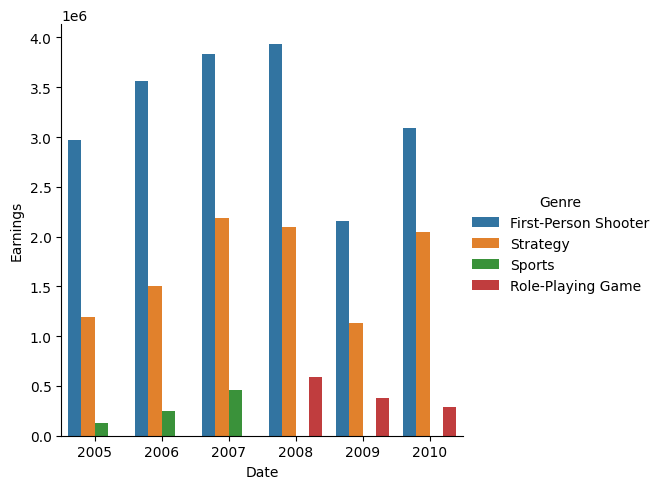

In [19]:
plt.figure(figsize=(20,15))
sns.catplot(x="Date",
            y="Earnings",
            hue="Genre",
            kind="bar",
            data=df_hist_anual_genero_top3_period2,
            errorbar=None);

<Figure size 2000x1500 with 0 Axes>

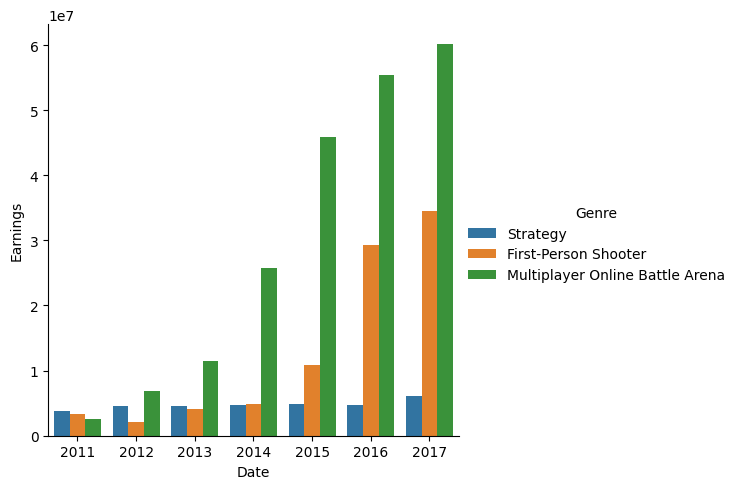

In [20]:
plt.figure(figsize=(20,15))
sns.catplot(x="Date",
            y="Earnings",
            hue="Genre",
            kind="bar",
            data=df_hist_anual_genero_top3_period3,
            errorbar=None);

<Figure size 2000x1500 with 0 Axes>

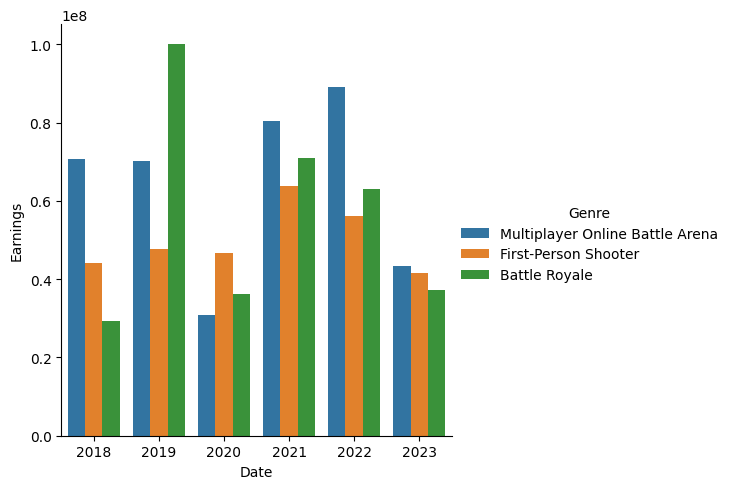

In [21]:
plt.figure(figsize=(20,15))
sns.catplot(x="Date",
            y="Earnings",
            hue="Genre",
            kind="bar",
            data=df_hist_anual_genero_top3_period4,
            errorbar=None);

In [22]:
'rgba(16, 112, 2, 0.8)'
'rgba(200, 65, 10, 0.8)'
'rgba(20, 112, 100, 0.8)'

'rgba(20, 112, 100, 0.8)'

In [23]:
colores = ['rgba(16, 112, 2, 0.8)','rgba(200, 65, 10, 0.8)','rgba(20, 112, 100, 0.8)']
data = []
color = 0
for i in df_hist_anual_genero_top3_period3['Genre'].unique():
    df_genero = df_hist_anual_genero_top3_period3[['Date','Earnings','Players','Tournaments']][df_hist_anual_genero_top3_period3['Genre'] == i]
    df_genero['Date'] = df_genero['Date'].str[:4]
    df_genero = df_genero.groupby('Date',as_index=False).sum()

    trace1 = go.Scatter(
                        x = df_genero['Date'],
                        y = df_genero['Earnings'],
                        name = i,
                        mode= 'lines',
                        marker = dict(color = colores[color]))

    color += 1
    data.append(trace1)

layout = dict(title = 'Earnings of esports by year of top 3 genre',
             xaxis= dict(title= '')
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)

In [24]:
colores = ['rgba(16, 112, 2, 0.8)','rgba(200, 65, 10, 0.8)','rgba(20, 112, 100, 0.8)']
data = []
color = 0
for i in df_hist_anual_genero_top3_period3['Genre'].unique():
    df_genero = df_hist_anual_genero_top3_period3[['Date','Earnings','Players','Tournaments']][df_hist_anual_genero_top3_period3['Genre'] == i]
    df_genero['Date'] = df_genero['Date'].str[:4]
    df_genero = df_genero.groupby('Date',as_index=False).sum()

    trace1 = go.Scatter(
                        x = df_genero['Date'],
                        y = df_genero['Tournaments'],
                        name = i,
                        mode= 'lines',
                        marker = dict(color = colores[color]))

    color += 1
    data.append(trace1)

layout = dict(title = 'Tournaments of esports by year of top 3 genre',
             xaxis= dict(title= '')
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)

In [25]:
colores = ['rgba(20, 112, 100, 0.8)','rgba(200, 65, 10, 0.8)','rgba(16, 112, 2, 0.8)']
data = []
color = 0
for i in df_hist_anual_genero_top3_period4['Genre'].unique():
    df_genero = df_hist_anual_genero_top3_period4[['Date','Earnings','Players','Tournaments']][df_hist_anual_genero_top3_period4['Genre'] == i]
    df_genero['Date'] = df_genero['Date'].str[:4]
    df_genero = df_genero.groupby('Date',as_index=False).sum()

    trace1 = go.Scatter(
                        x = df_genero['Date'],
                        y = df_genero['Earnings'],
                        name = i,
                        mode= 'lines',
                        marker = dict(color = colores[color]))

    color += 1
    data.append(trace1)

layout = dict(title = 'Earnings of esports by year of top 3 genre',
             xaxis= dict(title= '')
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)

In [26]:
colores = ['rgba(20, 112, 100, 0.8)','rgba(200, 65, 10, 0.8)','rgba(16, 112, 2, 0.8)']
data = []
color = 0
for i in df_hist_anual_genero_top3_period4['Genre'].unique():
    df_genero = df_hist_anual_genero_top3_period4[['Date','Earnings','Players','Tournaments']][df_hist_anual_genero_top3_period4['Genre'] == i]
    df_genero['Date'] = df_genero['Date'].str[:4]
    df_genero = df_genero.groupby('Date',as_index=False).sum()

    trace1 = go.Scatter(
                        x = df_genero['Date'],
                        y = df_genero['Tournaments'],
                        name = i,
                        mode= 'lines',
                        marker = dict(color = colores[color]))

    color += 1
    data.append(trace1)

layout = dict(title = 'Tournaments of esports by year of top 3 genre',
             xaxis= dict(title= '')
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)

In [27]:
df_hist_anual_game = df_esports_hist.copy()
df_hist_anual_game['Date'] = df_hist_anual_game['Date'].str[:4]
df_hist_anual_game = df_hist_anual_game.groupby(['Date','Game'],as_index=False).sum()
df_hist_anual_game.sort_values(['Date','Earnings'],ascending=[True,False],inplace=True)
df_hist_anual_game

,Date,Game,Earnings,Players,Tournaments
2,1998,Quake II,56500.00,21,4
3,1998,QuakeWorld,45300.00,28,3
4,1998,StarCraft: Brood War,20000.00,8,1
1,1998,Command & Conquer: Red Alert,15000.00,8,1
5,1998,Total Annihilation,15000.00,2,1
...,...,...,...,...,...
1989,2023,Quake III Arena,587.63,4,1
1933,2023,Beat Saber,516.50,7,1
1953,2023,F1 22,324.00,3,1
1931,2023,Artifact Classic,130.20,6,2


In [28]:
df_hist_anual_game_top3 = df_hist_anual_game.groupby('Date',sort=True).head(3)
df_hist_anual_game_top3.head(60)

,Date,Game,Earnings,Players,Tournaments
2,1998,Quake II,56500.00,21,4
3,1998,QuakeWorld,45300.00,28,3
4,1998,StarCraft: Brood War,20000.00,8,1
9,1999,StarCraft: Brood War,149719.12,49,11
6,1999,Descent 3,50000.00,1,1
8,1999,Quake III Arena,43200.00,18,2
16,2000,Quake III Arena,432522.82,176,29
17,2000,StarCraft: Brood War,140229.03,44,10
11,2000,Age of Empires II,113768.30,42,16
25,2001,Counter-Strike,346592.44,344,13


In [38]:
df_esports_general_offline = df_esports_general[['Genre','TotalEarnings','OfflineEarnings','TotalTournaments','TotalPlayers']].groupby('Genre',as_index=False).sum()
df_esports_general_offline['OfflineRatio'] = df_esports_general_offline['OfflineEarnings'] / df_esports_general_offline['TotalEarnings']
df_esports_general_offline['PlayersPerTournament'] = df_esports_general_offline['TotalPlayers'] / df_esports_general_offline['TotalTournaments']
df_esports_general_offline.sort_values('OfflineRatio')

,Genre,TotalEarnings,OfflineEarnings,TotalTournaments,TotalPlayers,OfflineRatio,PlayersPerTournament
5,Music / Rhythm Game,275047.90,56327.89,221,932,0.20,4.22
0,Battle Royale,339977760.49,163924196.30,3453,19699,0.48,5.70
7,Racing,17109276.54,9109630.86,1899,5146,0.53,2.71
9,Sports,84445830.92,51386123.62,5190,8775,0.61,1.69
1,Collectible Card Game,49275686.81,30465369.56,1875,5259,0.62,2.80
10,Strategy,111559483.32,69127511.32,14631,13405,0.62,0.92
6,Puzzle Game,97888.89,61713.85,97,256,0.63,2.64
8,Role-Playing Game,12747784.09,8670595.17,310,1035,0.68,3.34
3,First-Person Shooter,413559592.72,284624542.34,15743,52527,0.69,3.34
11,Third-Person Shooter,6105826.38,4297071.38,300,503,0.70,1.68


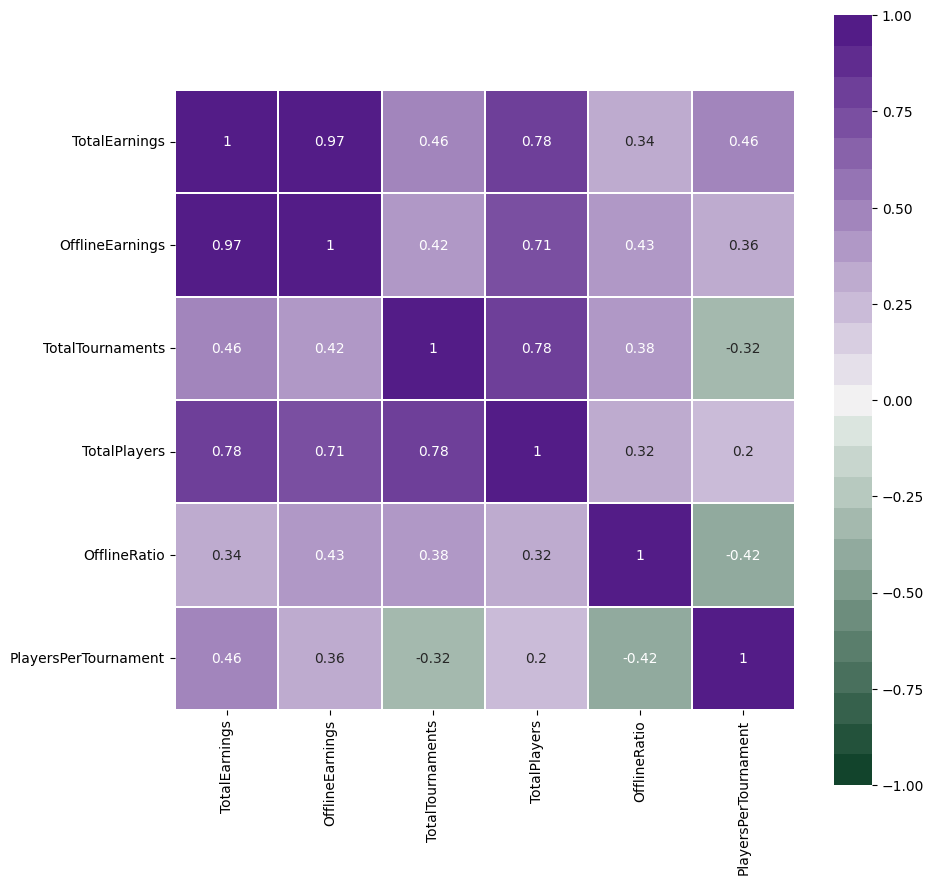

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(df_esports_general_offline.corr(numeric_only=True),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=25),
            square=True,
            linewidths=.1,
            annot=True);

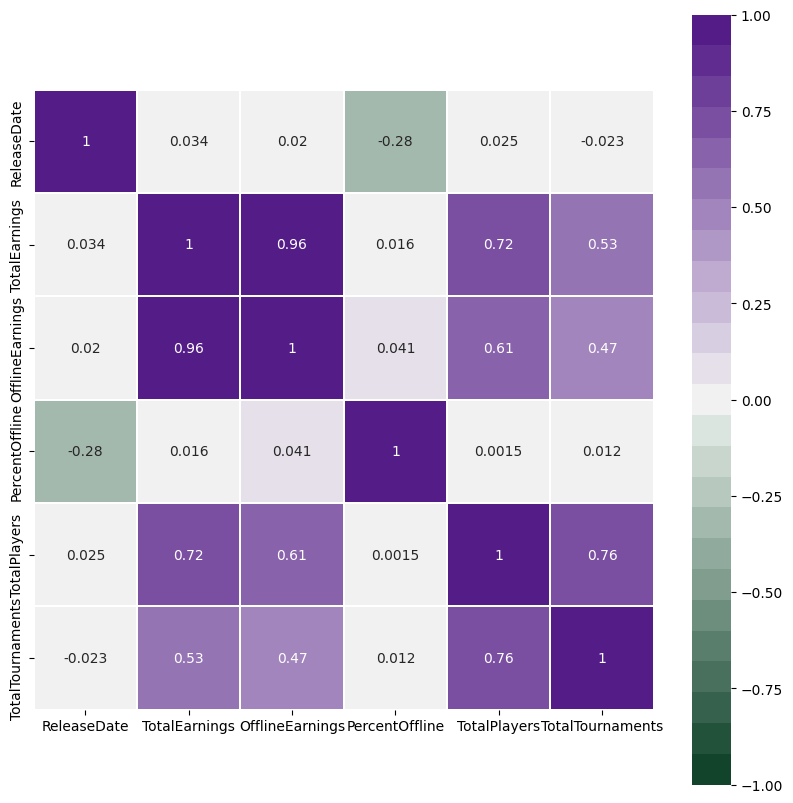

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(df_esports_general.corr(numeric_only=True),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=25),
            square=True,
            linewidths=.1,
            annot=True);